<h3>Importing the libraries</h3>

In [1]:
import sys

In [2]:
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install pydot

In [3]:
import os
import matplotlib.pyplot as plt
import pydot
import pandas as pd
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras.utils.vis_utils import plot_model

<h3>Hyperparameters</h3>

In [7]:
fc_size = 32
dropout_prob = 0.4
num_iterations = [100, 200, 300]

<h3>Importing the dataset</h3>

In [8]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,'Dataset')
model_dir = os.path.join(cwd,'Model')
graph_dir = os.path.join(cwd,'Graphs')

In [9]:
train_datagen = ImageDataGenerator(brightness_range=[0.1,0.4],
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator()

In [10]:
train_dataset = train_datagen.flow_from_directory(os.path.join(dataset_dir,'train'), 
                                                  target_size=(224, 224), 
                                                  batch_size=8,
                                                  color_mode = 'rgb')
test_dataset = test_datagen.flow_from_directory(os.path.join(dataset_dir,'test'), 
                                                target_size=(224, 224),
                                                color_mode = 'rgb')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


<h3>Building the model with Softmax</h3>

In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dense(units=fc_size, activation='relu'),
    layers.Dropout(dropout_prob),
    layers.Dense(2, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 179776)            0         
                                                                 
 dense (Dense)               (None, 32)                5

<h3>Training the model</h3>

Training for 100 iterations
Maximum Validation Accuracy obtained is 75.0%


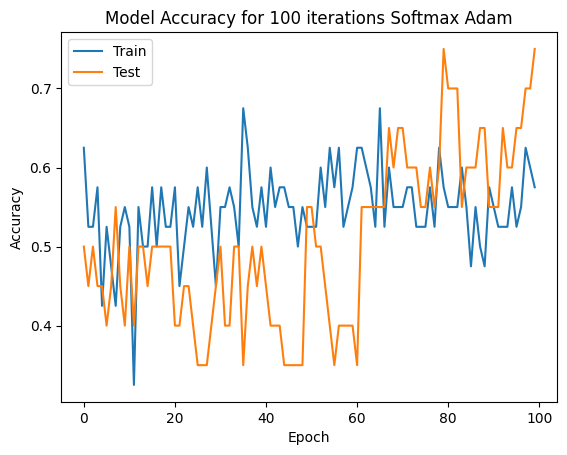

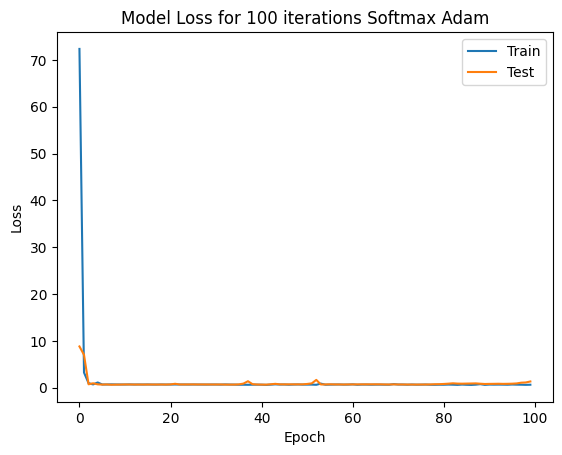

Training for 200 iterations
Maximum Validation Accuracy obtained is 80.0000011920929%


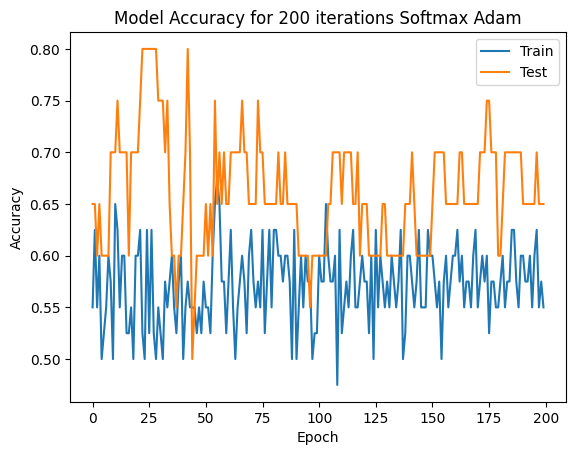

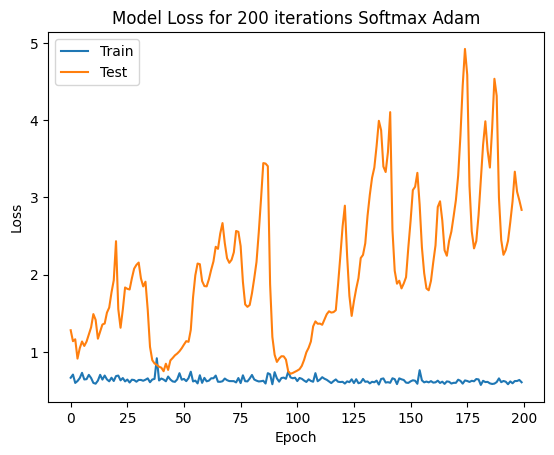

Training for 300 iterations
Maximum Validation Accuracy obtained is 80.0000011920929%


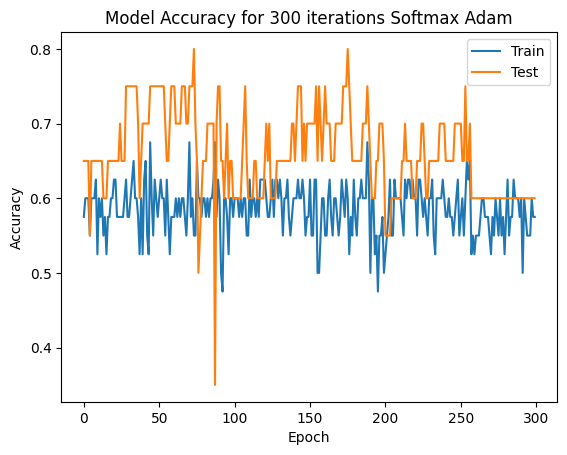

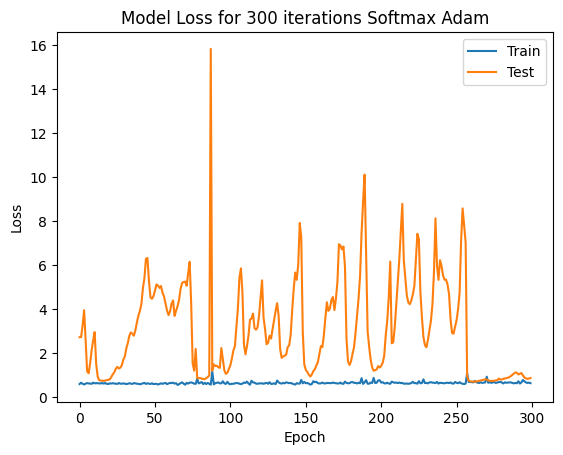

In [14]:
for iterations in num_iterations:
    plot_model(model,to_file=os.path.join(graph_dir,f'Pet_Classification_CNN_{iterations}_Softmax_Adam.png'),show_shapes=True,show_layer_names=True)
    print(f"Training for {iterations} iterations")
    history = model.fit(train_dataset, epochs=iterations, validation_data=test_dataset, verbose=0)
    
    max_acc=max(history.history['val_accuracy'])*100
    print(f'Maximum Validation Accuracy obtained is {max_acc}%')
    
    #summarizing history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    title = f'Model Accuracy for {iterations} iterations Softmax Adam'
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()
    
    #summarizing history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    title = f'Model Loss for {iterations} iterations Softmax Adam'
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'])
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()
    
    model.save(os.path.join(model_dir,f'Pet_Classification_CNN_{iterations}_Softmax_Adam.h5'))

<h3>Building the model without Softmax</h3>

In [19]:
models = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dense(fc_size, activation='relu'),
    layers.Dropout(dropout_prob),
    layers.Dense(2, activation='sigmoid')
])

In [20]:
models.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 179776)            0         
                                                                 
 dense_4 (Dense)             (None, 32)               

<h3>Training the model</h3>

Training for 100 iterations
Maximum Validation Accuracy obtained is 80.0000011920929%


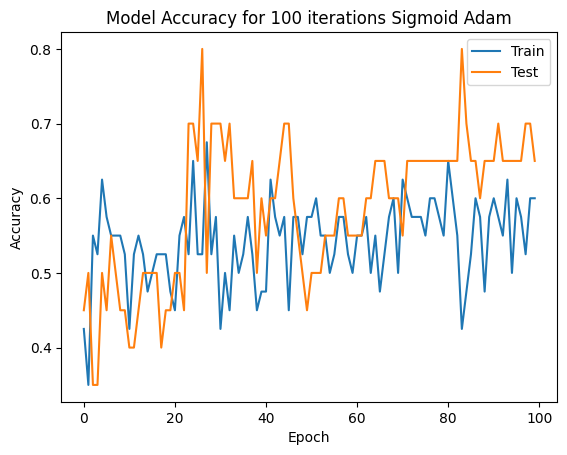

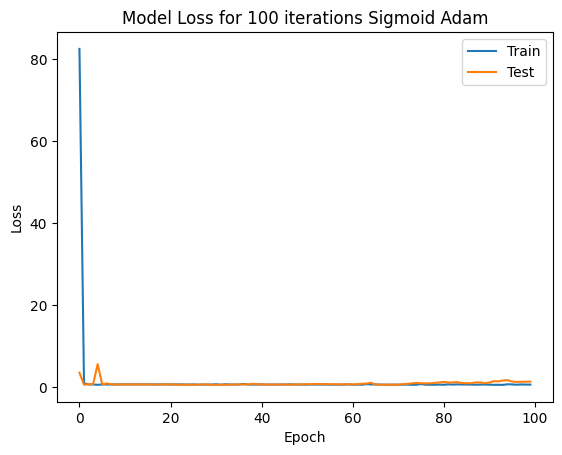

Training for 200 iterations
Maximum Validation Accuracy obtained is 75.0%


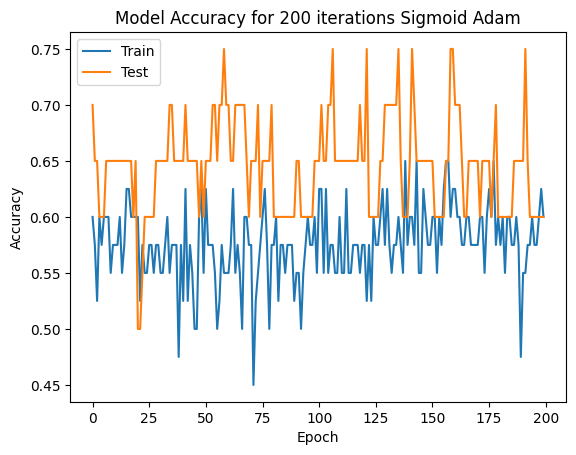

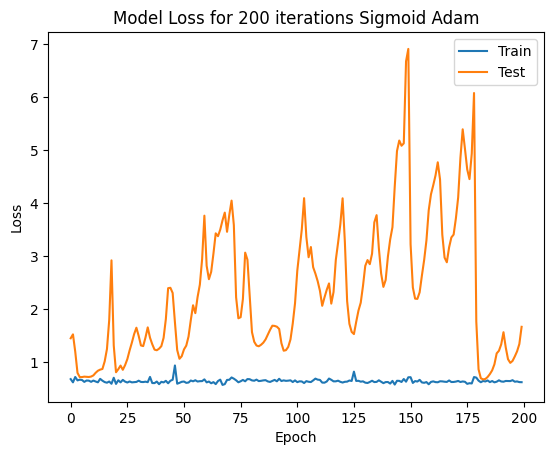

Training for 300 iterations
Maximum Validation Accuracy obtained is 80.0000011920929%


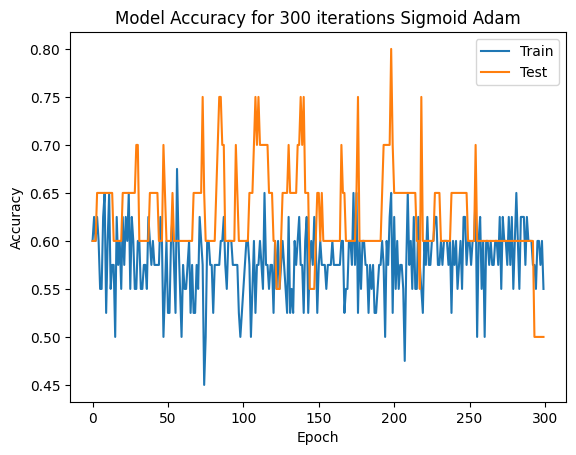

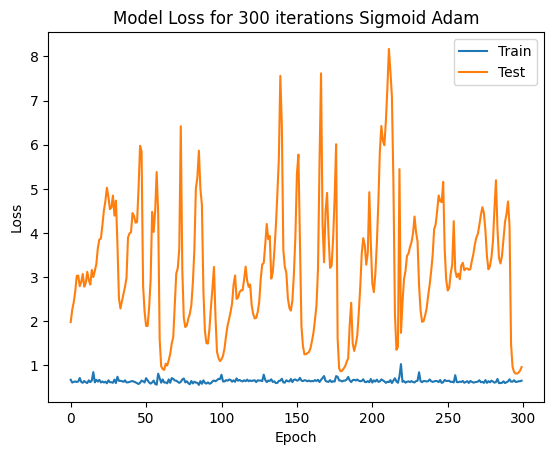

In [22]:
for iterations in num_iterations:
    plot_model(models,to_file=os.path.join(graph_dir,f'Pet_Classification_CNN_{iterations}_Sigmoid_Adam.png'),show_shapes=True,show_layer_names=True)
    print(f"Training for {iterations} iterations")
    history = models.fit(train_dataset, epochs=iterations, validation_data=test_dataset, verbose=0)
    
    max_acc=max(history.history['val_accuracy'])*100
    print(f'Maximum Validation Accuracy obtained is {max_acc}%')
    
    #summarizing history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    title = f'Model Accuracy for {iterations} iterations Sigmoid Adam'
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()
    
    #summarizing history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    title = f'Model Loss for {iterations} iterations Sigmoid Adam'
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'])
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()
    
    model.save(os.path.join(model_dir,f'Pet_Classification_CNN_{iterations}_Sigmoid_Adam.h5'))